ModuleNotFoundError: No module named 'sklearn'

In [1]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.1 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/11.1 MB 1.4 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.1 MB 1.3 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.1 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.1 MB 1.4 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.1 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

In [31]:
red_wine_data = pd.read_csv("C:\\Users\\awwal\\Desktop\\wine+quality\\winequality-red.csv")


In [32]:
red_wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
def classify_quality(Quality):
    if Quality <= 4:
        return "Low"
    elif Quality <= 6:
        return "Medium"
    else:
        return "High"


In [34]:
red_wine_data["Quality_scale"] = red_wine_data["Quality"].apply(classify_quality)


In [35]:
red_wine_data

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,Quality_scale
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Medium


In [36]:
scale_distribution = red_wine_data["Quality_scale"].value_counts()
scale_distribution

Quality_scale
Medium    1319
High       217
Low         63
Name: count, dtype: int64

In [37]:
!pip install matplotlib

^C


Defaulting to user installation because normal site-packages is not writeable


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\awwal\AppData\Local\Temp\ipykernel_14344\3188400201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Quality", data=red_wine_data, palette="viridis")


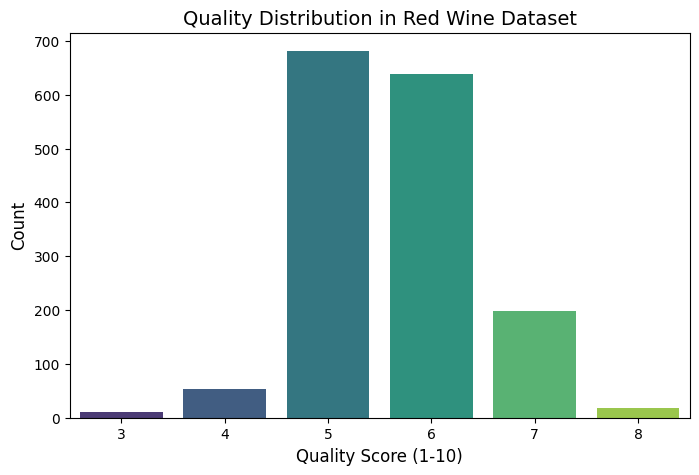

In [39]:
# Quality Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Quality", data=red_wine_data, palette="viridis")
plt.title("Quality Distribution in Red Wine Dataset", fontsize=14)
plt.xlabel("Quality Score (1-10)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [40]:
# Filter numeric columns only
numeric_data = red_wine_data.select_dtypes(include=['float64', 'int64'])

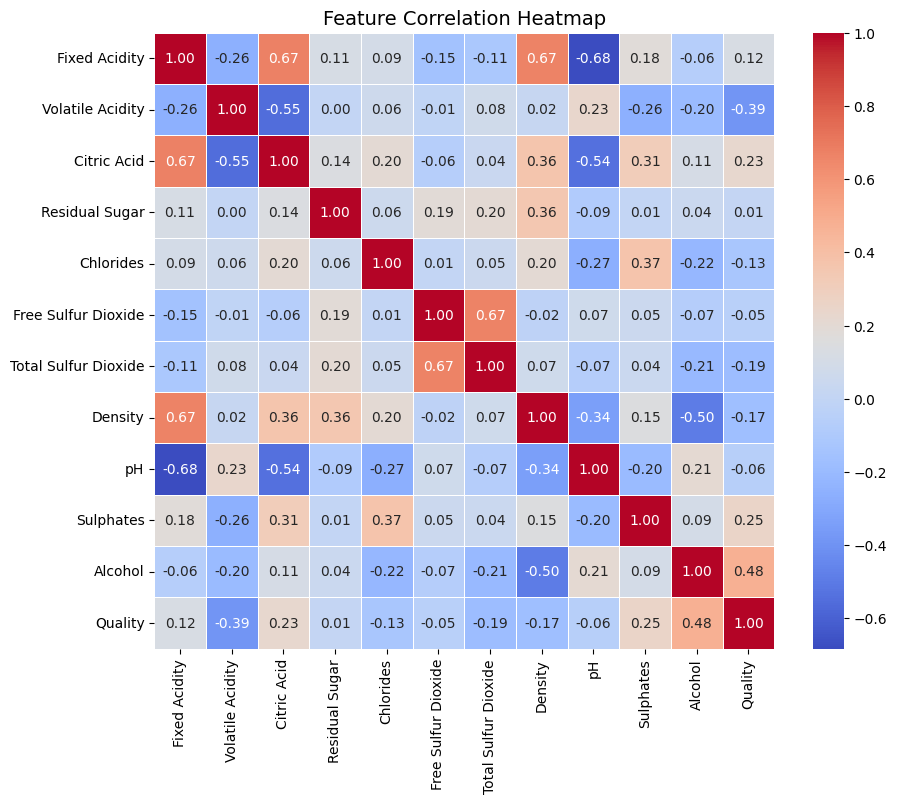

In [41]:
# Correlation Heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [42]:
# Handle outliers
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


In [43]:
key_features = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Alcohol']
for feature in key_features:
    red_wine_data = remove_outliers(red_wine_data, feature)


In [44]:
red_wine_data

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,Quality_scale
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Medium


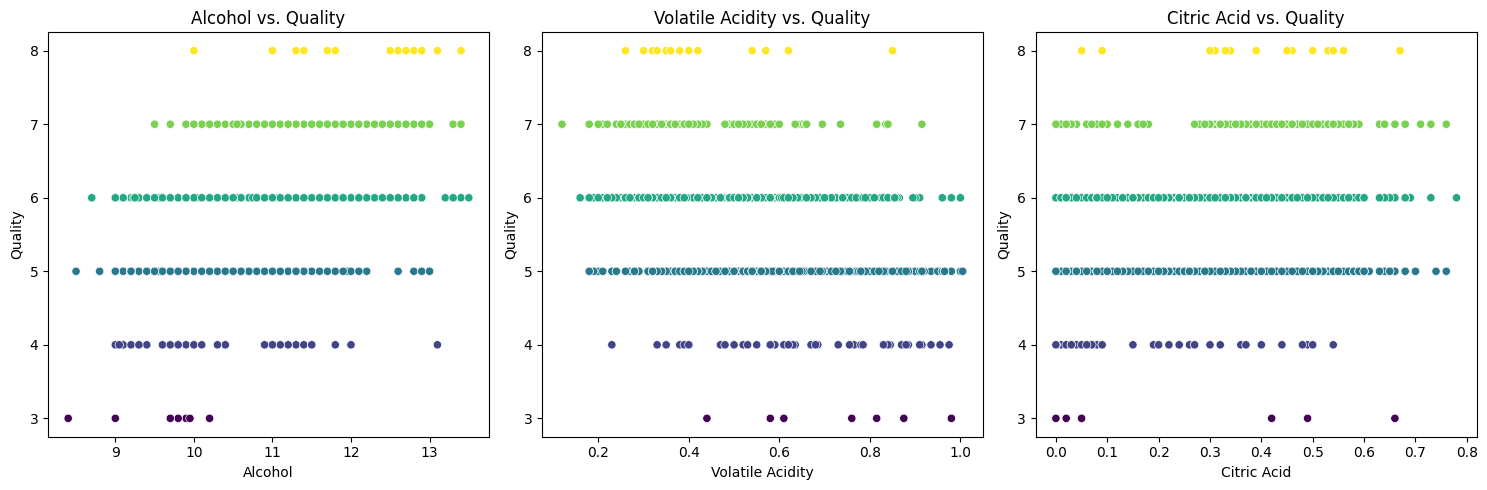

In [45]:
key_features = ["Alcohol", "Volatile Acidity", "Citric Acid"]
plt.figure(figsize=(15, 5))
for i, feature in enumerate(key_features, start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=feature, y="Quality", data=red_wine_data, hue="Quality", palette="viridis", legend=False)
    plt.title(f"{feature.title()} vs. Quality", fontsize=12)
    plt.xlabel(feature.title(), fontsize=10)
    plt.ylabel("Quality", fontsize=10)

plt.tight_layout()
plt.show()


Modeling

In [46]:
features = red_wine_data.drop(columns=['Quality', 'Quality_scale'])
target = red_wine_data['Quality_scale']


In [47]:
# Normalize features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.3, random_state=42)


In [49]:
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
print(target.isna().sum())  # Should be 0



0


In [51]:
red_wine_data

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,Quality_scale
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Medium


In [52]:
y_pred = random_forest_clf.predict(X_test)

In [53]:
# model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.68      0.55      0.61        58
         Low       0.00      0.00      0.00        17
      Medium       0.89      0.96      0.93       381

    accuracy                           0.87       456
   macro avg       0.53      0.50      0.51       456
weighted avg       0.83      0.87      0.85       456

Accuracy: 0.8728070175438597


C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [56]:
X= features

In [57]:
check_x= X.values
check_y= target.values

In [62]:
target

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
1594    Medium
1595    Medium
1596    Medium
1597    Medium
1598    Medium
Name: Quality_scale, Length: 1517, dtype: object

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define models as instances
models = []
models.append(("lr", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("lda", LinearDiscriminantAnalysis()))
models.append(("knn", KNeighborsClassifier()))
models.append(("dtc", DecisionTreeClassifier()))
models.append(("gnb", GaussianNB()))
models.append(("rfr", RandomForestClassifier()))
models.append(("svc",SVC()))

results = []
names = []

# Evaluate each model
for name, model in models:
    k_fold = StratifiedKFold(n_splits=10)
    cv_result = cross_val_score(model, check_x, check_y, cv=k_fold, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name, np.mean(cv_result), np.std(cv_result)))

# Optional: Aggregate results
print("All results:", results)


C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was de

lr: 0.843748 (0.018352)
lda: 0.833897 (0.035724)
knn: 0.808853 (0.030762)
dtc: 0.735056 (0.045380)
gnb: 0.789042 (0.062978)
rfr: 0.843761 (0.018698)
svc: 0.834542 (0.001927)
All results: [array([0.84868421, 0.86842105, 0.84210526, 0.84210526, 0.875     ,
       0.85526316, 0.80921053, 0.82781457, 0.83443709, 0.83443709]), array([0.82894737, 0.86184211, 0.83552632, 0.84210526, 0.88815789,
       0.80921053, 0.75      , 0.83443709, 0.86754967, 0.82119205]), array([0.82894737, 0.81578947, 0.76973684, 0.76973684, 0.86184211,
       0.81578947, 0.76973684, 0.8013245 , 0.84768212, 0.80794702]), array([0.80263158, 0.76973684, 0.69078947, 0.70394737, 0.73684211,
       0.72368421, 0.63815789, 0.75496689, 0.75496689, 0.77483444]), array([0.82894737, 0.84868421, 0.78289474, 0.80263158, 0.84868421,
       0.78947368, 0.64473684, 0.71523179, 0.85430464, 0.77483444]), array([0.86184211, 0.86842105, 0.84868421, 0.83552632, 0.86842105,
       0.80263158, 0.83552632, 0.8410596 , 0.83443709, 0.8410596 